# Assignment Week 15
## Group 3

1.  Use the finite difference method to solve the given boundary problem using step sizes $h=0.1$ and $h=0.01.$ Plot your two approximate solutions and the actual solutions on the same coordinate system.  
    (1) $x^{\prime\prime}=2x^{\prime}-x+t^{2}-1$ over $\left[  0,1\right]$ with $x\left(  0\right)  =5$ and $x\left(  1\right)  =10,$ $x\left(  t\right) =t^{2}+4t+5$.  

    (2) $x^{\prime\prime}+\left(  1/t\right)  x^{\prime}+(1-1/\left(
       4t^{2}\right)  )x=0$ over $\left[  1,6\right]$ with $x\left(  1\right)  =1$ and $x\left(  6\right)  =0,$ $x\left(  t\right)  =\dfrac{0.2913843206\cos   \left(  t\right)  +1.01299385\sin\left(  t\right)  }{\sqrt{t}}$.


In [36]:
# By Chen Danyang
import numpy as np 

def int_BVP(para, h, interval, BV):
    # change the function to ax'' + bx' + cx = d form.
    # para should be a function of t, return a list: [a, b, c, d]

    t = np.arange(interval[0], interval[1] + h, h)
    size = t.shape[0]

    # build matrix, x and b
    mat = np.mat(np.zeros([size, size]))
    B = np.mat(np.zeros([size, 1]))
    x = np.mat(np.zeros([size, 1]))

    # BVC
    mat[0, 0] = 1
    mat[size-1, size-1] = 1
    B[0, 0] = BV[0]
    B[size-1, 0] = BV[1]

    # derivatives
    for i in range(1, size-1):
        a, b, c, d = para(t[i])
        mat[i, i-1] = a / h**2 - b / h / 2
        mat[i, i] = -2 * a / h**2 + c
        mat[i, i+1] = a / h**2 + b / h / 2
        B[i, 0] = d

    # solve the function
    x = mat.I * B
    return np.array(x.reshape(-1))

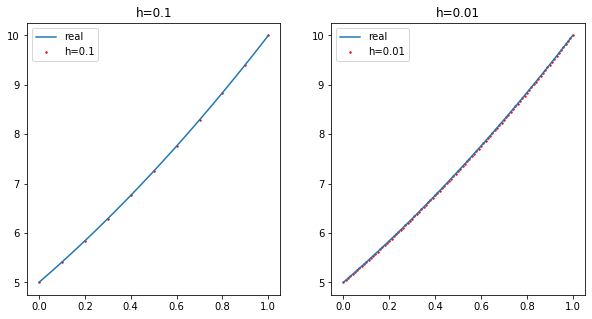

In [49]:
import matplotlib.pyplot as plt
# (1)
para_1 = lambda t: [1, -2, 1, t**2-1] 
real_sol_1 = lambda t: t**2 + 4 * t + 5

t_h1_f1 = np.arange(0, 1.1, 0.1)
x_h1_f1 = int_BVP(para_1, 0.1, [0, 1], [5, 10])
t_h2_f1 = np.arange(0, 1.01, 0.01)
x_h2_f1 = int_BVP(para_1, 0.01, [0, 1], [5, 10])

real_f1 = real_sol_1(t_h2_f1)

plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.scatter(t_h1_f1, x_h1_f1, label='h=0.1', s=2, c=[(1,0,0)])
plt.plot(t_h2_f1, real_f1, label='real')
plt.legend()
plt.title("h=0.1")
plt.subplot(122)
plt.scatter(t_h2_f1, x_h2_f1, label='h=0.01', s=2, c=[(1,0,0)])
plt.plot(t_h2_f1, real_f1, label='real')
plt.title("h=0.01")
plt.legend()
plt.show()

(2) $x^{\prime\prime}+\left(  1/t\right)  x^{\prime}+(1-1/\left(
       4t^{2}\right)  )x=0$ over $\left[  1,6\right]$ with $x\left(  1\right)  =1$ and $x\left(  6\right)  =0,$ $x\left(  t\right)  =\dfrac{0.2913843206\cos   \left(  t\right)  +1.01299385\sin\left(  t\right)  }{\sqrt{t}}$.


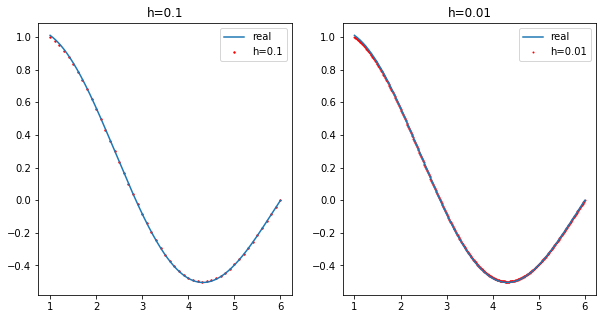

In [54]:
# (1)
para_2 = lambda t: [1, 1/t, 1-1/(4*t**2), 0] 
real_sol_2 = lambda t: (0.2913843206 * np.cos(t) + 1.01299385 * np.sin(t)) / np.sqrt(t)

t_h1_f2 = np.arange(1, 6.1, 0.1)
x_h1_f2 = int_BVP(para_2, 0.1, [1, 6], [1, 0])
t_h2_f2 = np.arange(1, 6.01, 0.01)
x_h2_f2 = int_BVP(para_2, 0.01, [1, 6], [1, 0])

real_f2 = real_sol_2(t_h2_f2)

plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.scatter(t_h1_f2, x_h1_f2, label='h=0.1', s=2, c=[(1,0,0)])
plt.plot(t_h2_f2, real_f2, label='real')
plt.legend()
plt.title("h=0.1")
plt.subplot(122)
plt.scatter(t_h2_f2, x_h2_f2, label='h=0.01', s=1, c=[(1,0,0)])
plt.plot(t_h2_f2, real_f2, label='real')
plt.title("h=0.01")
plt.legend()
plt.show()

In conclusion, finite difference method is a effective method for linear BVP. Even if the fraction of interval is not small (h=0.1), it performs well.

2. Solve the boundary value problem
    $$
    u_{xx} + 4u_x + e^xu = \sin(8x)
    $$
   numerically on $[-1, 1]$ with boundary conditions $u(\pm1) = 0$.

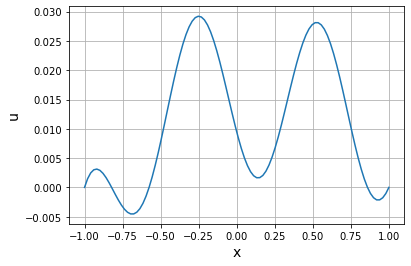

In [29]:
#by zhangxi

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-1,1,100)
dx = (x[-1]-x[0])/len(x)
x0 = x
x = x[1:-1]
b = np.sin(8*x)*dx**2

# 利用差分公式构造矩阵
dig = -2 + np.exp(x)*dx**2
A = np.diag(dig)
dig = (1-2*dx)*np.ones(len(x)-1)
A += np.diag(dig,-1)
dig = (1+2*dx)*np.ones(len(x)-1)
A += np.diag(dig,1)


u = np.linalg.solve(A,b)
u = np.append([0],u)
u = np.append(u,[0])
plt.plot(x0,u)
plt.grid('on')
plt.xlabel('x',fontsize=14)
plt.ylabel('u',fontsize = 14)
plt.show()

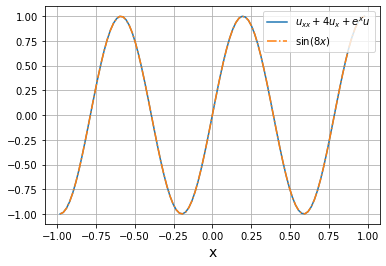

In [41]:
# 验证
f = (u[2:]-2*u[1:-1]+u[:-2])/dx**2+2*(u[2:]-u[:-2])/dx+np.exp(x)*u[1:-1]
plt.plot(x,f,label = r'$u_{xx}+4u_x+e^{x}u$')
plt.plot(x,np.sin(8*x),'-.',label=r'$\sin(8x)$')

plt.legend(loc='upper right')
plt.grid('on')
plt.xlabel('x',fontsize=14)
plt.ylabel('',fontsize = 14)
plt.show()

3. Apply the matrix representation method to solve Morse oscillator. The one-dimensional time-independent Schrödinger equation is given as: 
   $$
   -\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2}+V(x)\psi(x)=E\psi(x)
   $$
   where Morse potential is defined as
   $$
   V(x)=D(1-e^{-\beta x})^2
   $$
   The analytical solutions are  determined as
   $$\begin{aligned}
   E_n & = \hbar\omega_0\left(n+\frac{1}{2}\right)-\frac{\hbar^2\omega_0^2}{4D}\left(n+\frac{1}{2}\right)^2,\quad n=0,1,\cdots\\
\omega_0^2&=\frac{2D\beta^2}{m}
   \end{aligned}$$
   (1) Set $m=1$, $D=1$, $\beta=0.3$. Please write the script to calculate the five lowest energies numerically.  How do the results change with the increase of the size of the matrices?   
   (2) Please plot the corresponding wave functions of the five lowest-energy states.

   Hint: For simplicity, $\hbar=1$. 


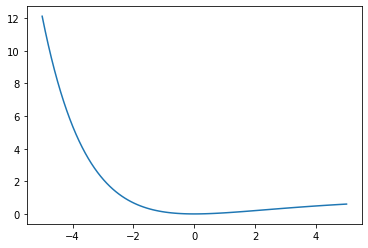

In [2]:
#potential figure
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-5,5,100)
V = (1-np.exp(-0.3*x))**2
plt.plot(x,V)

数值计算：[0.20088203 0.5351461  0.77941017 0.93367876 1.00351581]
公式给出：[0.20088203 0.5351461  0.77941017 0.93367424 0.99793831]


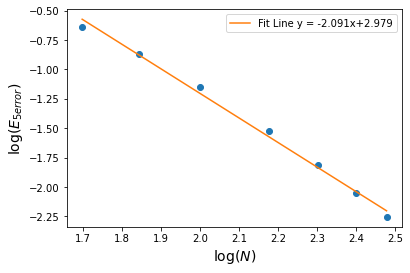

误差大概反比于矩阵维度N的平方


In [3]:
#by zhangxi
import numpy as np
import scipy.linalg as la
import scipy
mass = 1
omega0 = 1

E5 = []
s = 1/np.sqrt(mass*omega0)
NN = [50,70,100,150,200,250,300]
for N in NN:
    n = np.arange(1,N)
    m = np.sqrt(n)
    x = s/np.sqrt(2) * (np.diag(m,-1) + np.diag(m,1))
    p = 1j/s/np.sqrt(2) * (np.diag(m,-1) - np.diag(m,1))

    V = np.eye(x.shape[0]) - scipy.linalg.expm(-0.3*x)
    H = np.dot(p,p)/2/mass + V@V
    E = la.eigh(H,eigvals_only = True)
    E5.append(E[4])
    
print(f'数值计算：{E[0:5]}')
      
omega0 = np.sqrt(2*0.3**2)
E = omega0*(n-1+0.5) - omega0**2/4*(n-1+0.5)**2
print(f'公式给出：{E[0:5]}')

E5_error = np.array(E5) - E[4]
plt.plot(np.log10(NN),np.log10(E5_error),'o')
plt.xlabel(r'$\log(N)$',fontsize = 14)
plt.ylabel(r'$\log(E_{5 error})$',fontsize = 14)

cof = np.polyfit(np.log10(NN),np.log10(E5_error),1)
plt.plot(np.log10(NN),cof[0]*np.log10(NN)+cof[1],label = f'Fit Line y = {cof[0]:.4}x+{cof[1]:.4}')
plt.legend()
plt.show()
print('误差大概反比于矩阵维度N的平方')

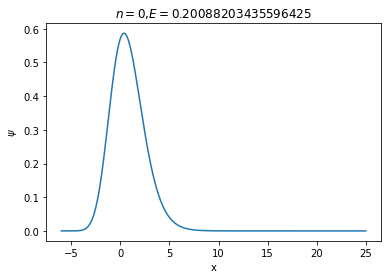

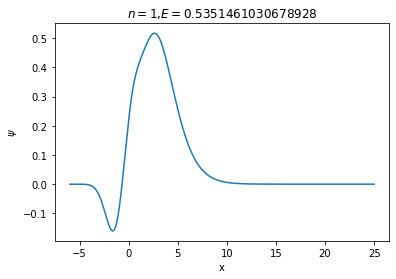

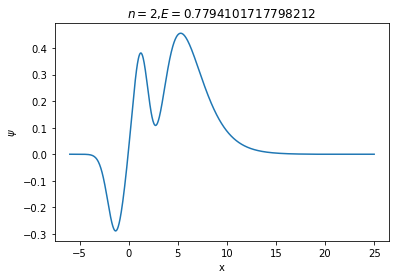

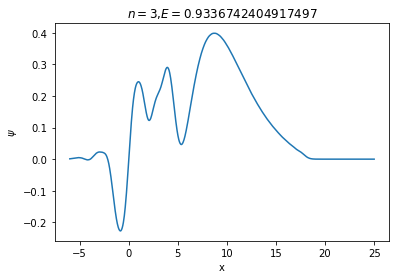

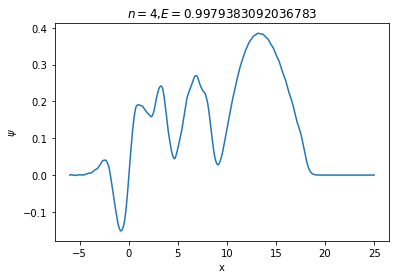

In [25]:
#2
import numpy as np
import scipy.special 
n = np.arange(1,170)
m = np.sqrt(n)
x = s/np.sqrt(2) * (np.diag(m,-1) + np.diag(m,1))
p = 1j/s/np.sqrt(2) * (np.diag(m,-1) - np.diag(m,1))

V = np.eye(x.shape[0]) - scipy.linalg.expm(-0.3*x)
H = np.dot(p,p)/2/mass + V@V
lamda, v = la.eigh(H)
x = np.linspace(-6,25,1000)

n0 = 170
psi = np.zeros((n0,len(x)))
for k in range(n0):
    #第k个基的值 psi_k(x)
    psi[k,:] = (1/np.pi)**0.25/(np.sqrt(2.0**k)*np.sqrt(1.0*np.math.factorial(k)))*scipy.special.eval_hermite(k,x)*np.exp(-x**2/2)    

for i in range(5):
    coff = v[:n0,i]
    coff = np.abs(coff.reshape(n0))
    
    value = coff@psi
    plt.plot(x,value)
    plt.title(r'$n=${},$E=${}'.format(i,E[i]))
    plt.xlabel('x')
    plt.ylabel(r'$\psi$')
    plt.show()
    plt.close()
    

N取的越大曲线越光滑（越精确），以上图像N取了170,以及希望波函数在两端的值为0，所以右边界绝对值比左边界绝对值大

4.  Apply the shooting method or the matching method to calculate the first few energy levels and the associated wave functions for a potential of the form
    $$
    V = \frac{1}{2}k_1x^2+\frac{1}{2}k_2{x^4}
    $$
    For small $x$ the first $(k_1)$ term dominates, and the behavior is close to that found for the harmonic oscillator, while for large $x$ the second $(k_2)$ term dominates and the behavior is anharmonic. 
    You can set $k_1=1$, $k_2=0.1$. $\hbar=m=1$.

The energy level under k1 = 1, k2 = 0.1 is:

E = 0.536, normalizatoin = 1.00000
E = 1.653, normalizatoin = 1.00000
E = 2.884, normalizatoin = 1.00000
E = 4.176, normalizatoin = 1.00000
E = 5.564, normalizatoin = 1.00000
E = 6.985, normalizatoin = 1.00000

As we can see, for abs(x) < 4, wave function behave harmonically.
    While abs(x) > 4, the wave function is anharmonic and oscilate severely.


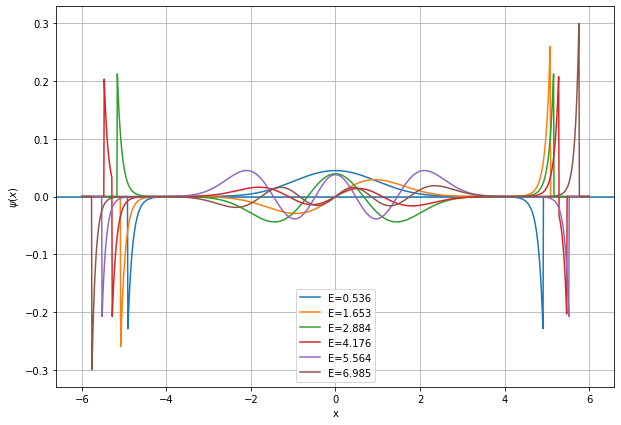

In [2]:
# HJH
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def potential(x,k1=1,k2=0.1):
    return k1*x**2/2 + k2*x**4/2

def se_shooting(E=0.1, k1=1, k2=0.1, parity='even', dx=0.01, dE=0.01, b=5, xmax=6):
    # initial guess of energy E, increment dE
    # wavefunction with define k1, k2
    # step size of x grid dx
    # cutoff parameter b 
    
    x = np.arange(0, xmax+dx, dx)
    N = len(x)

    def initialize_psi(N,dx,parity='even'):
        # intialize wave function
        psi = np.zeros(N)

        if parity == 'even':
            # initial condition of even partiy solution
            psi[0] = 1
            psi[1] = psi[0]
        else:
            # initial condition of odd partiy solution
            psi[0] = 0
            psi[1] = dx
        return psi  
   
    psi = initialize_psi(N,dx,parity)
    tol = 0.5e-5   # stopping criterion, if wave function converges

    # initialize last_diverge which keeps tracks of the direction of the divergin trned
    last_diverge = 0 # we don't kow this direction a priori

    dx2 = dx * dx
    while True:
        for i in range(2,N-2):
            psi[i] = 2*psi[i-1] - psi[i-2] - 2 * (E - potential(x[i-1],k1,k2)) * psi[i-1] * dx2
            if abs(psi[i]) > b:
                break

        if abs(dE) < tol:
            break

        if psi[i] * last_diverge < 0:
            dE = -dE / 2
        E = E + dE
        last_diverge = np.sign(psi[i])
    
    xi = np.concatenate([-x[-1:0:-1],x])                   

    if psi[0] == 0:
        psii = np.concatenate([-psi[-1:0:-1],psi])
    else:
        psii = np.concatenate([psi[-1:0:-1],psi])
    psii = psii / np.sqrt(np.sum(psii * psii)) # normalisation

    return E,xi,psii 

def se_shooting_app(k1=1, k2=0.1, xmax=6):
    # plot the lowest six states
    
    # initialize plot
    fig = plt.figure(figsize=(10,7))
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$')
    plt.grid('on')
    plt.axhline()
    
    # initialize first guess
    E_init = 0.1
    DeltaE = 0.2
    
    print('The energy level under k1 = {}, k2 = {} is:\n'.format(k1,k2))
    for n in range(0,3):
        E,x,psi = se_shooting(E_init,k1,k2,parity='even',xmax=xmax)
        plt.plot(x,psi,label='E={:.3f}'.format(E))
        print('E = {:.3f}, normalizatoin = {:.5f}'.format(E,np.sum(psi*psi)))

        E,x,psi = se_shooting(E_init,k1,k2,parity='odd',xmax=xmax)
        plt.plot(x,psi,label='E={:.3f}'.format(E))
        print('E = {:.3f}, normalizatoin = {:.5f}'.format(E,np.sum(psi*psi)))

        E_init = E + DeltaE
    
    plt.legend()

if __name__ == '__main__':
    #test_wavefunction()
    se_shooting_app()
    print('\nAs we can see, for abs(x) < 4, wave function behave harmonically.\n\
    While abs(x) > 4, the wave function is anharmonic and oscilate severely.')

5.  (Optional) Apply the matching method to obtain the energy eigenvalues and wave functions for the ground state and the first few excited states for the one-dimensional Lennard-Jones potential, which is given as
    $$
    V(x)=4\epsilon\left[\left(\frac{\sigma}{x}\right)^{12}-\left(\frac{\sigma}{x}\right)^{6}\right]
    $$
    with $\epsilon=10$ and $\sigma=1$. The integrations can be started at $x_L=0.5$ (on the left) and $x_R=5$ (on the right) with $\Delta x=0.01$. The matching point shall be chosen near the minimum of the potential because the absolute value of wave function approaches its maximum there.

6. (Optional) Many three-dimensional quantum mechanics problems can be reduced effectively to one- or two-dimensional problems. For example, the hydrogen atom is three dimensional, however, the spherical symmetry makes it possible to write the wave function in the form
   $$
   \psi(r,\theta,\varphi)=R(r)Y(\theta,\varphi)
   $$ 
   It is common practice to deal instead with the related function $U(r)$, 
   $$
   U(r) = rR(r)
   $$
   which satisfies the equation
   $$
   \frac{d^2 U(r)}{dr^2}=\left(2[V(r)-E]+\frac{l(l+1)}{r^2}\right)
   U(r) \quad\quad (1)
   $$
   where $V(r)=-1/r$ is the Coulomb potential and $l$ is an integer associated with the angular momentum of the electron, $l=0,1,\cdots$. Employ the shooting method to solve Eq.(1) for $U(r)$ starting the integration at $r=0$ with the initial value $U(r)=0$. Consider the cases $l=0$ and $l=1$ and compare your results with the analytic solutions for the hydrogen atom. 
   Hint: The energies of the bound states are given by $-1/2n^2$, where $n=1,2,\cdots$.

7. (Optional) Employ the central finite difference method to solve the BVP defined by
   $$
   -\nabla^2 u=20\cos(3\pi x)\sin(2\pi y)
   $$
   on a unit square with boundary conditions
   $$\begin{cases}
   u(0,y)=y^2\\
   u(1,y)=1\\
   u(x,0)=x^3\\
   u(x,1)=1
   \end{cases}
   $$

8. One way to calculate $\pi$ is by randomly throwing a dart into the unit square defined by $x \in [0, 1]$ and $y\in [0, 1]$ in the $xy$ plane. The chance of the dart landing inside the unit circle centered at the origin of the coordinates is $\pi/4$, from the comparison of the areas of one quarter of the circle and the unit square. Write a program to calculate $\pi$ in such a manner.

In [4]:
# HJH
import random as rd
N, runs = 0, int(1e7)
# The side of the square is 1
for n in range(1,runs):
    x = [rd.random(),rd.random()]
    # calculate the square of distance
    dis = (x[0]-0.5)**2 + (x[1]-0.5)**2
    if dis <= 0.25:
        N += 1

pi3 = 4 * N / runs
print('pi = {} after 1e7 iteration and the absolute error is {}.\n'.format(pi3,abs(pi3-np.pi)/np.pi))
print('Although the monte carlo method looks tricky,\n\
it is time consuming and still with a considerably high error.')

pi = 3.1413636 after 1e7 iteration and the absolute error is 7.291002209702471e-05.

Although the monte carlo method looks tricky,
it is time consuming and still with a considerablly high error.
